In [1]:
from trout.stars import get_star
import numpy as np
import pprint # For pretty printing

In [2]:
pp = pprint.PrettyPrinter(indent=4)

In [9]:
def analyze_step(start_star, end_star, from_year, to_year):
    
    star_to_step_dict = {}
    star_step_list = []
    
    
    for star_no in range(start_star, end_star + 1):
        star = get_star(star_no)
        step_ratio = star.step(from_year, to_year)
        star_to_step_dict[star_no] = step_ratio
        # Note that it's important that we don't put stars that have nan values 
        # into the list if we are to use later sort that list. nan values mess up 
        # sorting
        if not np.isnan(step_ratio):
            star_step_list.append((star_no, step_ratio))
        
    return star_to_step_dict, star_step_list

In [10]:
import matplotlib.pyplot as plt

def step_stat_vis(stars_step_list):
    x = [i[1] for i in stars_step_list]
    y = [5 for i in range(len(x))]
    
    plt.plot(x, y, "ro")
    plt.xlabel("Step")
    plt.ylabel("Bogus")
    ax = plt.gca()
    ax.set_xlim([0.7, 1.3])
    ax.set_ylim([0, 10])
    plt.show()
    

In [11]:
def report_step_analysis(star_start, end_star, from_year, to_year):
    step_dict, step_list  = analyze_step(star_start, end_star, from_year, to_year)
    step_list.sort(key=lambda x : x[1]) # Sort by ratio
    print("Top 10 stars that got dimmer")
    pp.pprint(step_list[:10])
    print("Top 10 stars that got brighter")
    pp.pprint(sorted(step_list[-10:], key=lambda x : -x[1])) # Sort (highest ratio first)
    print("Middlish 10 stars")
    mid_value = len(step_list) // 2
    pp.pprint(step_list[mid_value - 5:mid_value + 5])

/opt/tljh/user/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/tljh/user/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


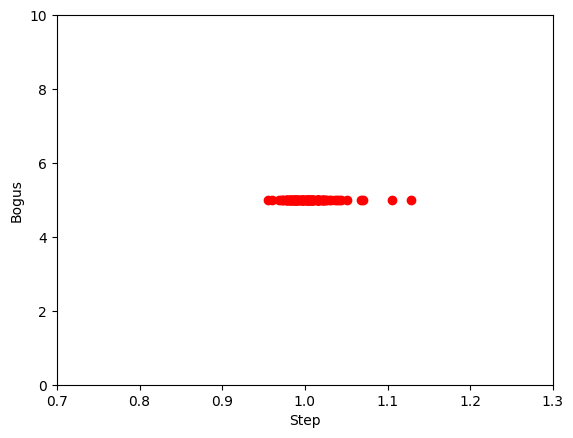

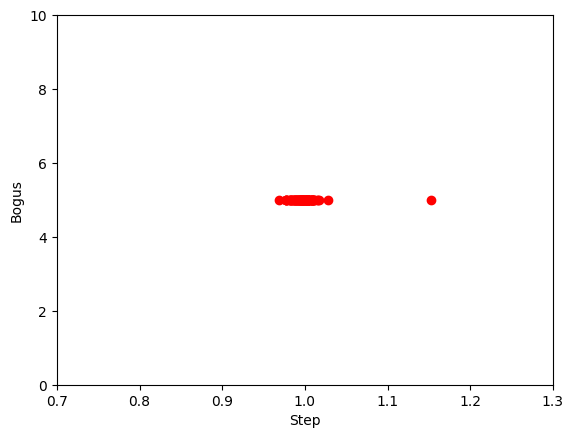

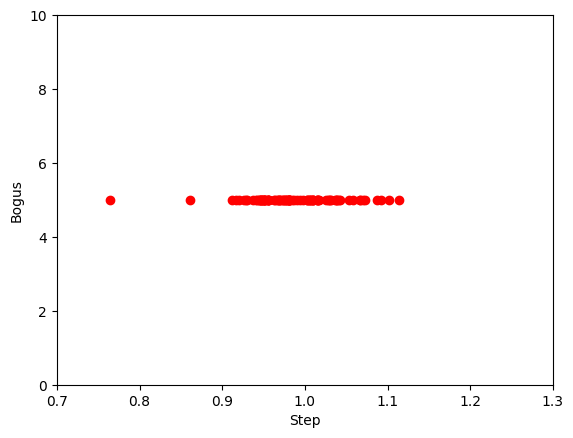

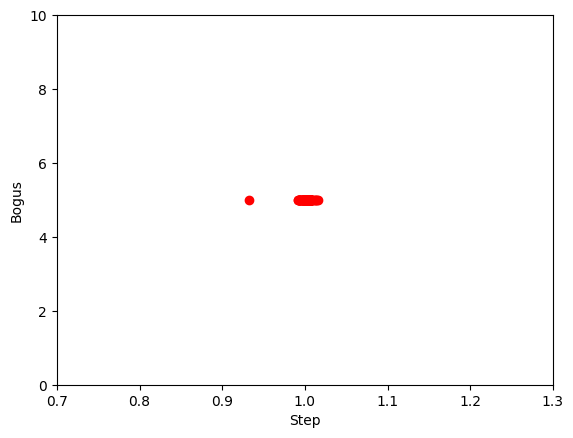

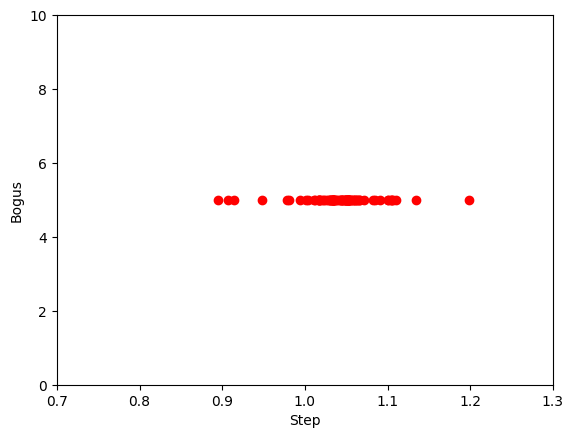

In [12]:
years = [
    (2003, 2005),
    (2008, 2009),
    (2011, 2012),
    (2015, 2016),
    (2021, 2022)  
]

for f, t in years:
    d = analyze_step(1, 100, f, t)
    step_stat_vis(d[1])

In [ ]:
# 2011 - 2012 Step for all 1 to 100
report_step_analysis(1, 100, 2011, 2012)

In [ ]:
dimmers = [1, 5, 4, 3, 85, 6, 84, 75, 97]
brighter = [58, 7, 43, 62, 88, 59, 27, 92, 30, 56]
middlish = [31, 99, 34, 91, 65, 14, 57, 51, 9, 39]

for i in dimmers:
    print(get_star(i).get_internight_band())
    
print('-----------------')


for i in brighter:
    print(get_star(i).get_internight_band())
    
print('---------------')


for i in middlish:
    print(get_star(i).get_internight_band())

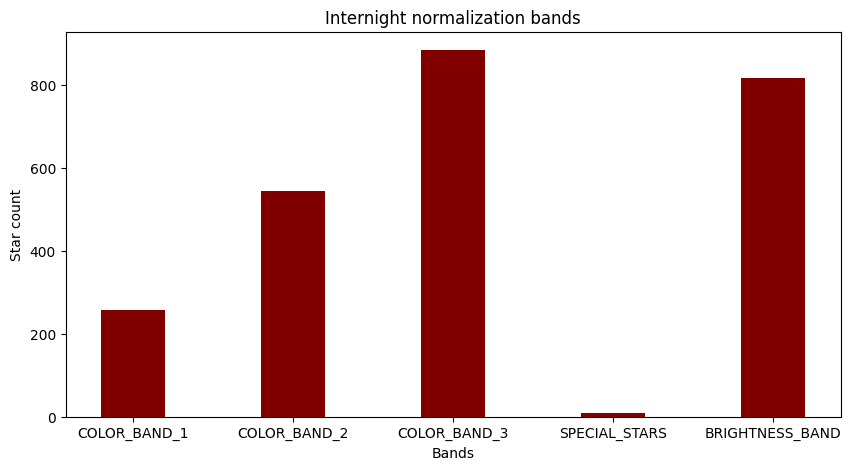

In [1]:
from trout.vis import internight_bands

internight_bands()

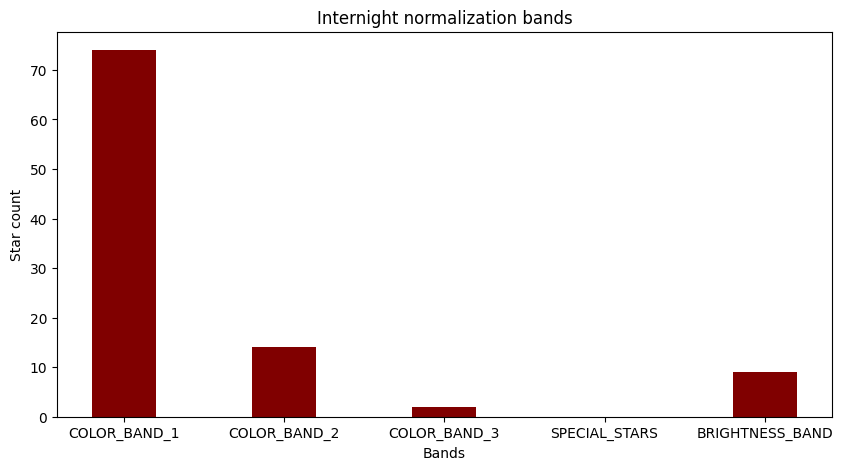

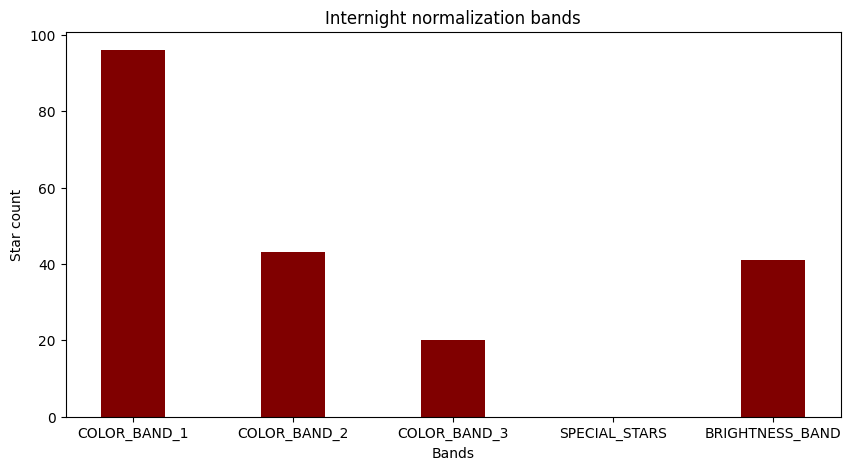

In [2]:
internight_bands(range(100))
internight_bands(range(100, 300))

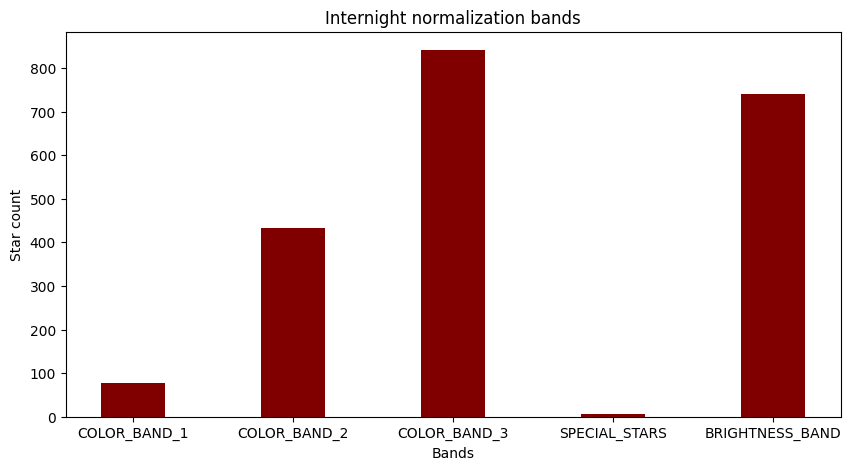

In [4]:
internight_bands(range(400, 2500))

In [ ]:
# 2011 - 2012 Step for all 1 to 100
report_step_analysis(1, 100, 2011, 2012)

In [ ]:
# 2015-2016 Step Analysis
report_step_analysis(1, 100, 2015, 2016)

In [ ]:
# 2008-2009 Step Analysis
report_step_analysis(1, 100, 2008, 2009)

In [ ]:
# 2003-2011 Step Analysis
report_step_analysis(1, 100, 2003, 2011)

In [ ]:
# 2012-2021 Step Analysis
report_step_analysis(1, 100, 2012, 2021)

In [ ]:
# 2003-2010 Step Analysis
report_step_analysis(1, 100, 2003, 2010)

In [ ]:
# 2003-2008 Step Analysis
report_step_analysis(1, 100, 2003, 2008)

In [ ]:
# 2003-2005 Step Analysis
report_step_analysis(1, 100, 2003, 2005)

In [ ]:
# 2003-2006 Step Analysis
report_step_analysis(1, 100, 2003, 2006)

In [ ]:
# 2003-2007 Step Analysis
report_step_analysis(1, 100, 2003, 2007)

In [ ]:
# 2021-2022 Step Analysis
report_step_analysis(1, 100, 2021, 2022)

In [1]:
from trout.vis import preview_step
from trout.stars import get_star
from trout.internight import InternightBands

/opt/tljh/user/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/tljh/user/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


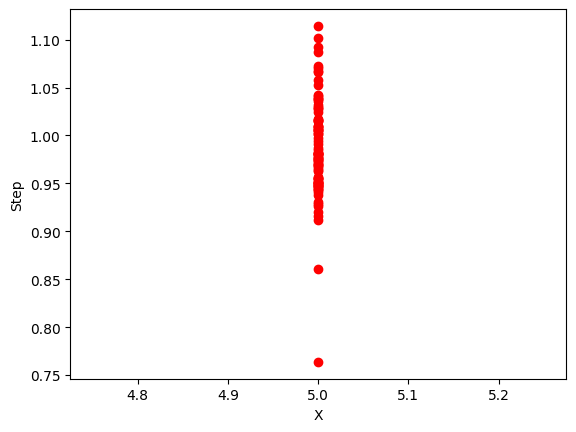

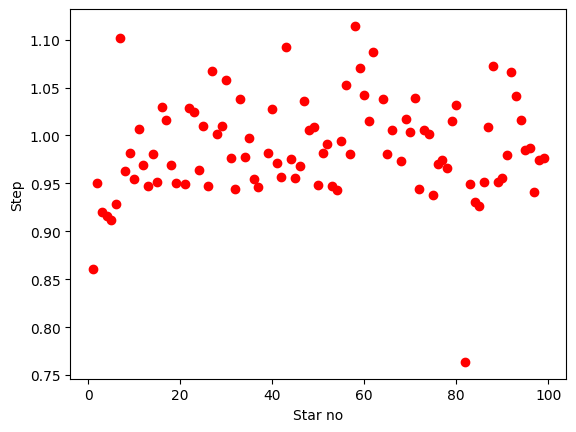

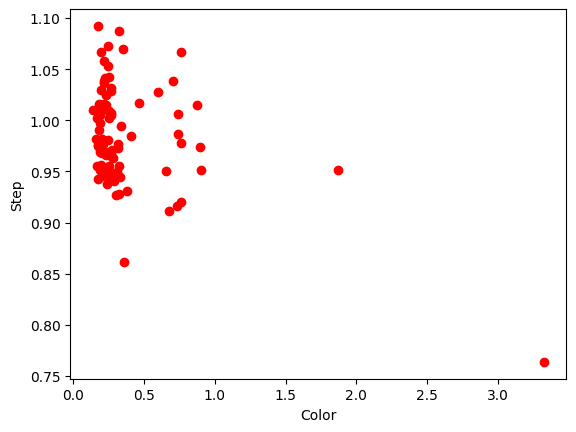

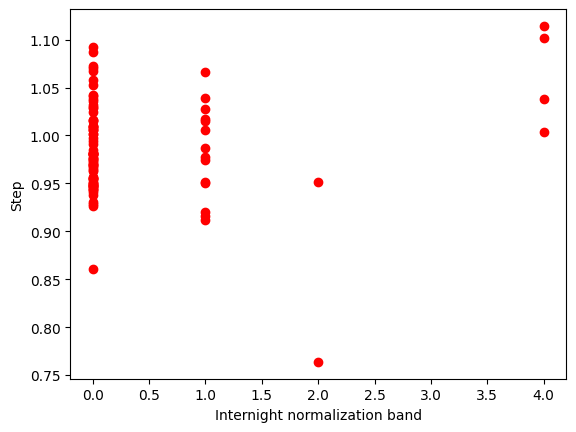

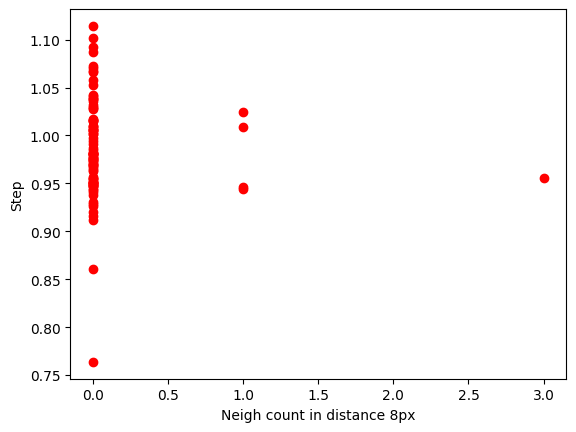

In [3]:
preview_step(1, 100, 2011, 2012,)
preview_step(1, 100, 2011, 2012, get_x=lambda x: x, x_label="Star no")

# Internight Bands
internight_bands = [
    InternightBands.COLOR_BAND_1,
    InternightBands.COLOR_BAND_2,
    InternightBands.COLOR_BAND_3,
    InternightBands.SPECIAL_STARS,
    InternightBands.BRIGHTNESS_BAND
]

preview_step(1, 
             100, 
             2011, 
             2012, 
             get_x=lambda x: internight_bands.index(get_star(x).internight_band), 
             x_label="Internight normalization band"
            )

preview_step(1, 
             100, 
             2011, 
             2012, 
             get_x=lambda x: len(get_star(x).neighbors_within_distance(8)), 
             x_label="Neigh count in distance 8px"
            )

preview_step(1, 
             100, 
             2011, 
             2012, 
             get_x=lambda x: len(get_star(x).neighbors_within_distance(8)), 
             x_label="Neigh count in distance 8px"
            )

In [2]:
get_star(1).neighbors_within_distance(100)

[(1919, 16.573487864658972),
 (2251, 16.587311415657407),
 (2268, 16.590204941470688),
 (954, 18.6893151292389),
 (1741, 22.32067427296947),
 (461, 33.16280597295715),
 (129, 33.368308317923436),
 (2156, 34.529176068941986),
 (2027, 34.956292709610885),
 (934, 35.12408432970175),
 (128, 37.33733788046492),
 (466, 38.62975537069841),
 (1183, 38.76518283202088),
 (1167, 38.944864873305214),
 (1778, 43.002906878489),
 (495, 44.07886114681274),
 (1793, 44.88572713012454),
 (390, 47.28847745487266),
 (69, 48.75767119131102),
 (736, 48.80635716789359),
 (886, 50.45283936509421),
 (1218, 50.70955038254628),
 (1524, 50.84154600324428),
 (2289, 51.38221968735877),
 (685, 52.37954562613158),
 (708, 56.04057458663324),
 (1494, 57.71099808528692),
 (1084, 59.24720584128844),
 (654, 59.371676749103116),
 (1405, 61.08082677894924),
 (1403, 61.09005238170943),
 (285, 62.156789653263154),
 (2041, 63.28526921804151),
 (1082, 64.31955379198466),
 (2221, 66.6216211150704),
 (1369, 66.78869515120056),
 (1

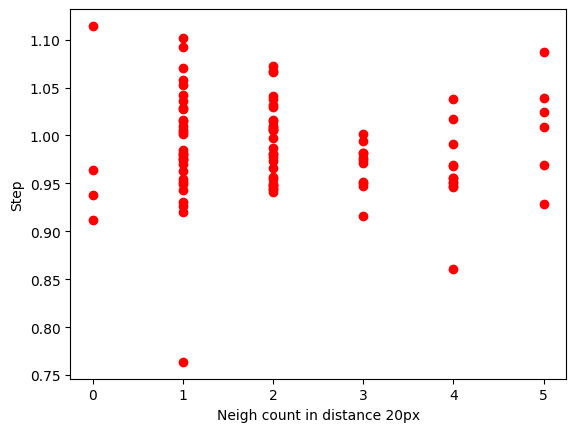

In [5]:
d = 20
preview_step(1, 
             100, 
             2011, 
             2012, 
             get_x=lambda x: len(get_star(x).neighbors_within_distance(d)), 
             x_label=f"Neigh count in distance {d}px"
            )

In [6]:
from trout.vis import field

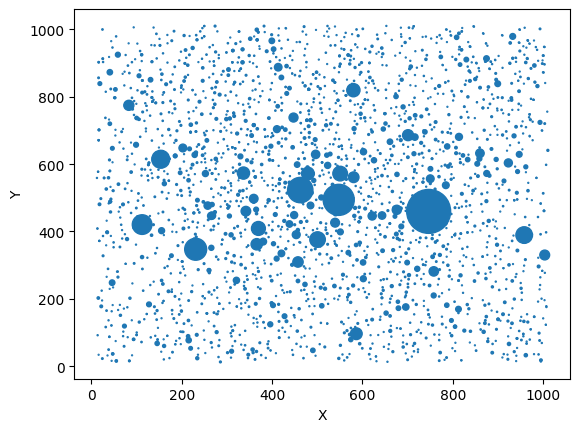

In [7]:
field()